# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**MUHAMMAD, YAHYA**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import  matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_test.csv')

In [3]:
bf = pd.read_csv('df_train.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [68]:
# look at data statistics

df.tail(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2917,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.0,0.666667,0.0,...,289.483333,288.816667,288.820000,284.15,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.0,0.666667,0.0,...,285.816667,285.150000,284.473333,280.15,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.0,1.333333,0.0,...,283.816667,276.816667,281.133333,276.15,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


In [69]:
bf.tail(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.33,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.41,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,...,282.150000,287.483333,276.816667,281.02,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [77]:
del df['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [76]:
del bf['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [78]:
df.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.15,283.150000,279.866667,279.15
1,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.15,281.150000,279.193333,278.15
2,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.0,89.666667,0.0,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.15,280.483333,276.340000,276.15


In [79]:
# View the data
bf.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


In [9]:
# Group madrid Columns

Madrid = ['Madrid_wind_speed', 'Madrid_humidity', 'Madrid_clouds_all', 'Madrid_rain_1h', 'Madrid_weather_id', 'Madrid_pressure', 'Madrid_temp_max', 'Madrid_temp', 'Madrid_temp_min']

#describe the test data
df[Madrid]

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
0,5.000000,71.333333,0.0,0.0,800.0,1030.000000,280.816667,279.866667,279.150000
1,4.666667,78.000000,0.0,0.0,800.0,1030.333333,280.483333,279.193333,278.150000
2,2.333333,89.666667,0.0,0.0,800.0,1030.666667,276.483333,276.340000,276.150000
3,2.666667,82.666667,0.0,0.0,800.0,1032.333333,277.150000,275.953333,274.483333
4,4.000000,64.000000,0.0,0.0,800.0,1032.333333,281.150000,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...
2915,0.333333,49.666667,0.0,0.0,800.0,1031.666667,281.483333,274.910000,271.150000
2916,0.333333,28.333333,0.0,0.0,800.0,1031.333333,287.816667,283.156667,280.483333
2917,1.000000,26.333333,0.0,0.0,800.0,1030.000000,288.816667,287.733333,286.483333
2918,1.000000,56.666667,0.0,0.0,800.0,1030.333333,285.150000,283.813333,282.150000


In [10]:
bf[Madrid]

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
0,0.666667,64.000000,0.000000,0.0,800.000000,971.333333,265.938000,265.938000,265.938000
1,0.333333,64.666667,0.000000,0.0,800.000000,972.666667,266.386667,266.386667,266.386667
2,1.000000,64.333333,0.000000,0.0,800.000000,974.000000,272.708667,272.708667,272.708667
3,1.000000,56.333333,0.000000,0.0,800.000000,994.666667,281.895219,281.895219,281.895219
4,1.000000,57.000000,0.000000,0.0,800.000000,1035.333333,280.678437,280.678437,280.678437
...,...,...,...,...,...,...,...,...,...
8758,1.000000,95.666667,45.000000,0.0,727.666667,1024.000000,280.816667,279.686667,278.483333
8759,5.000000,85.000000,85.000000,0.0,762.000000,1023.666667,283.483333,282.400000,280.150000
8760,6.333333,71.000000,85.000000,0.1,702.333333,1021.666667,285.150000,283.956667,281.150000
8761,7.333333,79.000000,56.666667,0.3,500.000000,1023.000000,283.483333,282.666667,280.816667


In [8]:
df[Madrid].describe()

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,2.457820,62.644463,24.255822,0.059863,758.820101,1016.240411,288.888393,287.869763,286.618130
std,1.774838,24.138393,29.430257,0.193218,93.536025,9.624074,9.089699,8.977511,8.733163
min,0.000000,8.000000,0.000000,0.000000,262.500000,943.000000,269.816667,268.713333,267.816667
25%,1.333333,43.000000,0.000000,0.000000,800.000000,1013.666667,281.483333,280.816667,279.816667
50%,2.000000,63.000000,11.333333,0.000000,800.000000,1017.333333,287.483333,286.396667,285.483333
75%,3.333333,84.000000,40.000000,0.000000,800.666667,1021.333333,295.483333,294.452500,293.150000
max,13.333333,100.000000,92.000000,3.000000,804.000000,1036.000000,313.483333,312.223333,310.150000


In [7]:
# Drescribe the train data
bf[Madrid].describe()

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,57.414717,19.473392,0.037818,773.527594,1010.316920,289.540309,288.419439,287.202203
std,1.850371,24.335396,28.053660,0.152639,77.313315,22.198555,9.752047,9.346796,9.206237
min,0.000000,6.333333,0.000000,0.000000,211.000000,927.666667,264.983333,264.983333,264.983333
25%,1.000000,36.333333,0.000000,0.000000,800.000000,1012.333333,282.150000,281.404281,280.299167
50%,2.000000,58.000000,0.000000,0.000000,800.000000,1017.333333,288.116177,287.053333,286.083333
75%,3.333333,78.666667,33.333333,0.000000,800.666667,1022.000000,296.816667,295.154667,293.884500
max,13.000000,100.000000,100.000000,3.000000,804.000000,1038.000000,314.483333,313.133333,310.383333


In [81]:
# evaluate correlation

df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Madrid_wind_speed,1.000000,0.253975,0.577509,-0.107176,-0.055267,0.164097,0.404369,0.166845,0.277087,0.203092,...,-0.034217,-0.024364,-0.028548,-0.029330,-0.041190,-0.022688,-0.056954,-0.023627,-0.023591,-0.046734
Bilbao_rain_1h,0.253975,1.000000,0.155717,0.103573,0.149643,0.414151,0.118086,0.080647,0.183078,0.030641,...,-0.207383,-0.223619,-0.202221,-0.221014,-0.239588,-0.196089,-0.258778,-0.233939,-0.218465,-0.217309
Valencia_wind_speed,0.577509,0.155717,1.000000,-0.214738,-0.100565,0.126358,0.423967,0.080878,0.281658,0.409237,...,-0.003885,-0.004474,-0.001078,0.028977,0.015834,0.001775,-0.003910,0.030320,-0.006542,-0.033857
Seville_humidity,-0.107176,0.103573,-0.214738,1.000000,0.771534,0.033669,-0.172222,0.388829,-0.233416,-0.182931,...,-0.587597,-0.668035,-0.587903,-0.562529,-0.547807,-0.585128,-0.514154,-0.743369,-0.658135,-0.630085
Madrid_humidity,-0.055267,0.149643,-0.100565,0.771534,1.000000,0.005968,-0.043188,0.327895,-0.169288,-0.057157,...,-0.673470,-0.789474,-0.672803,-0.607507,-0.588370,-0.668369,-0.548738,-0.740434,-0.777081,-0.756214
Bilbao_clouds_all,0.164097,0.414151,0.126358,0.033669,0.005968,1.000000,0.001085,0.010232,0.227288,0.036946,...,-0.075326,-0.102398,-0.071588,-0.128791,-0.167230,-0.067711,-0.215278,-0.132752,-0.104385,-0.108140
Bilbao_wind_speed,0.404369,0.118086,0.423967,-0.172222,-0.043188,0.001085,1.000000,0.138443,0.519614,0.302084,...,-0.025420,-0.001129,-0.022682,0.078474,0.097111,-0.019624,0.117940,0.060728,-0.004439,-0.030676
Seville_clouds_all,0.166845,0.080647,0.080878,0.388829,0.327895,0.010232,0.138443,1.000000,0.007418,0.045497,...,-0.166132,-0.208761,-0.158508,-0.126255,-0.123033,-0.150160,-0.114845,-0.170409,-0.206495,-0.213871
Bilbao_wind_deg,0.277087,0.183078,0.281658,-0.233416,-0.169288,0.227288,0.519614,0.007418,1.000000,0.182693,...,0.112969,0.132334,0.114064,0.157191,0.146133,0.114486,0.124797,0.145157,0.130515,0.112450
Barcelona_wind_speed,0.203092,0.030641,0.409237,-0.182931,-0.057157,0.036946,0.302084,0.045497,0.182693,1.000000,...,0.038945,0.015559,0.034937,0.069284,0.063306,0.031155,0.051541,0.068690,0.006909,-0.018323


In [73]:
bf.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


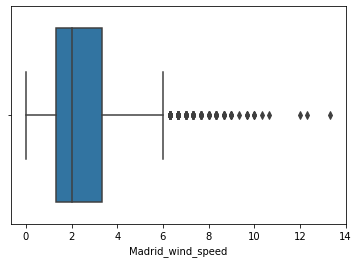

In [82]:
# have a look at feature distributions

sns.boxplot(x='Madrid_wind_speed', data=df)

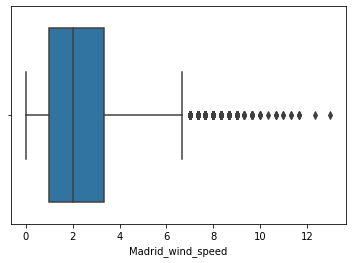

In [83]:
sns.boxplot(x='Madrid_wind_speed', data=bf)

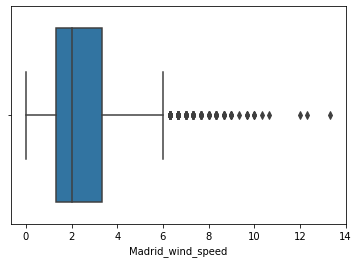

In [84]:
sns.boxplot(x='Madrid_wind_speed', data=df)

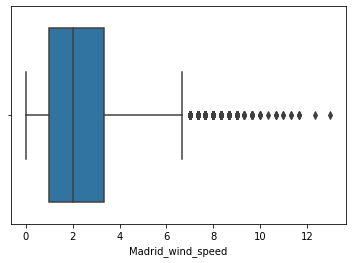

In [85]:
sns.boxplot(x='Madrid_wind_speed', data=bf)

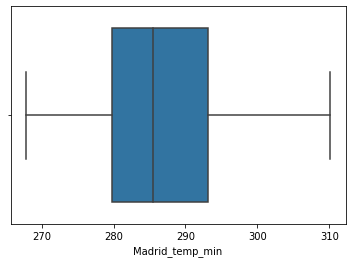

In [49]:
sns.boxplot(x='Madrid_temp_min', data=df)

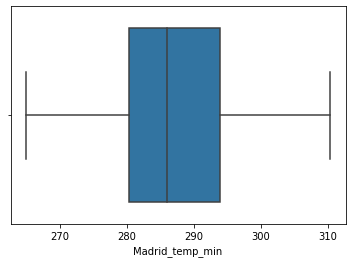

In [86]:
sns.boxplot(x='Madrid_temp_min', data=bf)

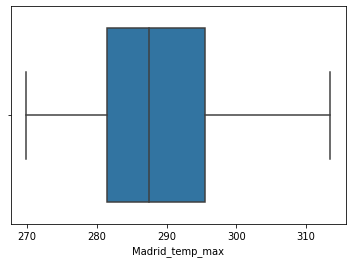

In [50]:
sns.boxplot(x='Madrid_temp_max', data=df)

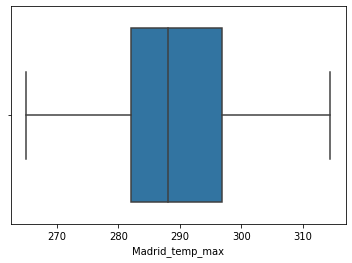

In [87]:
sns.boxplot(x='Madrid_temp_max', data=bf)

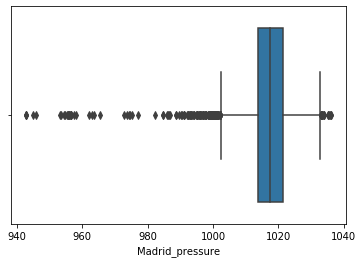

In [51]:
sns.boxplot(x='Madrid_pressure', data=df)

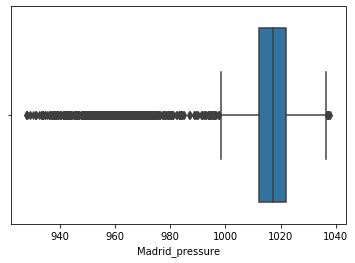

In [88]:
sns.boxplot(x='Madrid_pressure', data=bf)

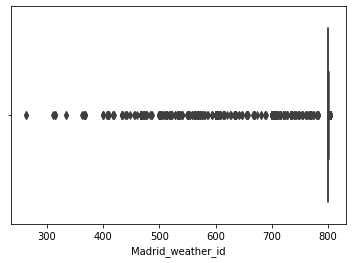

In [52]:
sns.boxplot(x='Madrid_weather_id', data=df)

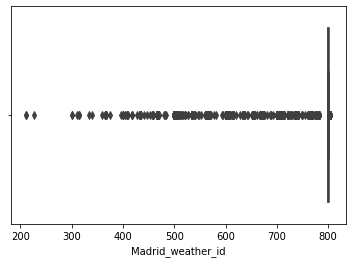

In [90]:
sns.boxplot(x='Madrid_weather_id', data=bf)

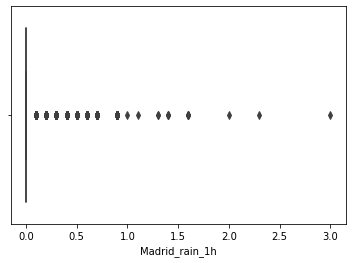

In [53]:
sns.boxplot(x='Madrid_rain_1h', data=df)

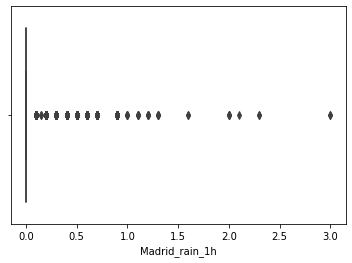

In [91]:
sns.boxplot(x='Madrid_rain_1h', data=bf)

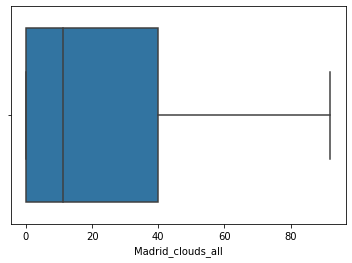

In [54]:
sns.boxplot(x='Madrid_clouds_all', data=df)

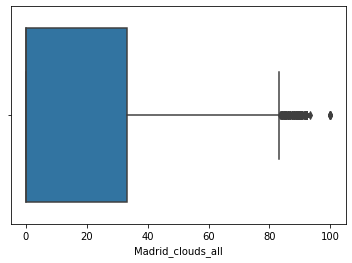

In [92]:
sns.boxplot(x='Madrid_clouds_all', data=bf)

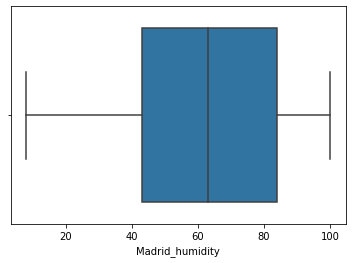

In [55]:
sns.boxplot(x='Madrid_humidity', data=df)

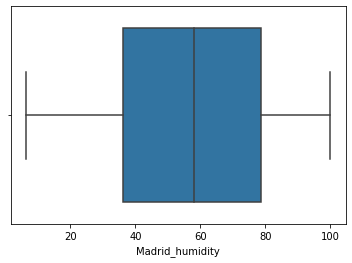

In [93]:
sns.boxplot(x='Madrid_humidity', data=bf)

In [94]:
df.skew()

Madrid_wind_speed        1.494269
Bilbao_rain_1h           3.404307
Valencia_wind_speed      1.328872
Seville_humidity        -0.508637
Madrid_humidity         -0.135537
Bilbao_clouds_all       -0.124933
Bilbao_wind_speed        1.381876
Seville_clouds_all       1.628723
Bilbao_wind_deg          0.322569
Barcelona_wind_speed     1.080200
Barcelona_wind_deg      -0.029036
Madrid_clouds_all        0.925034
Seville_wind_speed       1.346297
Barcelona_rain_1h        5.989675
Seville_rain_1h          6.269205
Bilbao_snow_3h           0.000000
Barcelona_pressure      -0.572509
Seville_rain_3h         54.037024
Madrid_rain_1h           5.211963
Barcelona_rain_3h       40.017330
Valencia_snow_3h         0.000000
Madrid_weather_id       -2.439600
Barcelona_weather_id    -2.577583
Bilbao_pressure         -0.952458
Seville_weather_id      -3.103741
Valencia_pressure       -1.779108
Seville_temp_max         0.473503
Madrid_pressure         -2.608926
Valencia_temp_max        0.019499
Valencia_temp 

In [95]:
bf.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

In [96]:
df.kurtosis()

Madrid_wind_speed          2.567383
Bilbao_rain_1h            16.905396
Valencia_wind_speed        2.100244
Seville_humidity          -0.710306
Madrid_humidity           -1.134569
Bilbao_clouds_all         -1.488942
Bilbao_wind_speed          2.306390
Seville_clouds_all         1.417797
Bilbao_wind_deg           -1.017392
Barcelona_wind_speed       1.410571
Barcelona_wind_deg        -0.956300
Madrid_clouds_all         -0.566527
Seville_wind_speed         2.369604
Barcelona_rain_1h         52.069367
Seville_rain_1h           48.243445
Bilbao_snow_3h             0.000000
Barcelona_pressure         1.175366
Seville_rain_3h         2920.000000
Madrid_rain_1h            41.250278
Barcelona_rain_3h       1642.238858
Valencia_snow_3h           0.000000
Madrid_weather_id          5.349404
Barcelona_weather_id       6.056749
Bilbao_pressure            1.866927
Seville_weather_id         9.557456
Valencia_pressure          4.966557
Seville_temp_max          -0.259161
Madrid_pressure           14

In [97]:
bf.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

In [100]:
df['Madrid_rain_1h']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2915    0.0
2916    0.0
2917    0.0
2918    0.0
2919    0.0
Name: Madrid_rain_1h, Length: 2920, dtype: float64

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [56]:
# remove missing values/ features

df['Madrid_wind_speed'].dtypes
df['Madrid_wind_speed'].isnull().sum()

0

In [57]:
df['Madrid_humidity'].dtypes
df['Madrid_humidity'].isnull().sum()

0

In [58]:
df['Madrid_clouds_all'].dtypes
df['Madrid_clouds_all'].isnull().sum()

0

In [59]:
df['Madrid_rain_1h'].dtypes
df['Madrid_rain_1h'].isnull().sum()

0

In [60]:
df['Madrid_weather_id'].dtypes
df['Madrid_weather_id'].isnull().sum()

0

In [61]:
df['Madrid_pressure'].dtypes
df['Madrid_pressure'].isnull().sum()

0

In [62]:
df['Madrid_temp_max'].dtypes
df['Madrid_temp_max'].isnull().sum()

0

In [66]:
df['Madrid_temp'].dtypes
df['Madrid_temp'].isnull().sum()

0

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic